In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
from datetime import datetime

In [2]:
df = pd.read_csv("btc.csv")
small_df = df[["date","PriceBTC","PriceUSD"]]
small_df.head()

,date,PriceBTC,PriceUSD
0,2009-01-03,1,NaN
1,2009-01-04,1,NaN
2,2009-01-05,1,NaN
3,2009-01-06,1,NaN
4,2009-01-07,1,NaN


In [3]:
small_df.describe()

,PriceBTC,PriceUSD
count,4687.0,4126.000000
mean,1.0,6209.959971
std,0.0,12332.842921
min,1.0,0.050541
25%,1.0,96.135108
50%,1.0,608.780069
75%,1.0,7387.693476
max,1.0,66061.796564


### Missing values for PriceUSD variable

In [4]:
indexesUSD = []
count = 0
for i in small_df.PriceUSD.isnull().values:
    if i == True:
        indexesUSD.append(count)
    count += 1

(array([1., 1., 1., ..., 0., 0., 0.]),
 array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.685e+03, 4.686e+03,
        4.687e+03]),
 <BarContainer object of 4687 artists>)

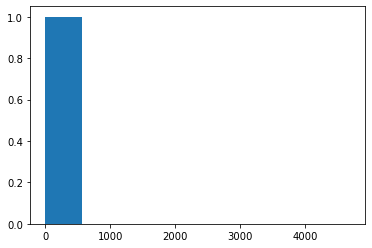

In [5]:
plt.hist(indexesUSD,bins=len(small_df),range=(0,len(small_df)))

In [6]:
print(indexesUSD)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

### Missing values for PriceBTC variable

In [7]:
indexesBTC = []
count = 0
for i in small_df.PriceBTC.isnull().values:
    if i == True:
        indexesBTC.append(count)
    count += 1

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.685e+03, 4.686e+03,
        4.687e+03]),
 <BarContainer object of 4687 artists>)

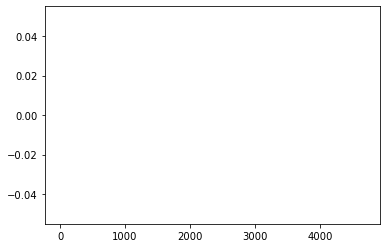

In [8]:
plt.hist(indexesBTC,bins=len(small_df),range=(0,len(small_df)))

## BitCoin Data

<AxesSubplot:>

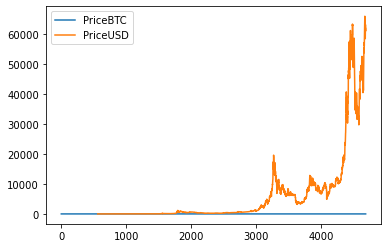

In [9]:
small_df.plot()

Price BTC has no interest we discard it

In [10]:
small_df = df[["date","PriceUSD"]]

In [11]:
small_df["date"][0]

'2009-01-03'

## Study 

In [12]:
datetime.strptime(small_df["date"][0], '%Y-%m-%d')

datetime.datetime(2009, 1, 3, 0, 0)

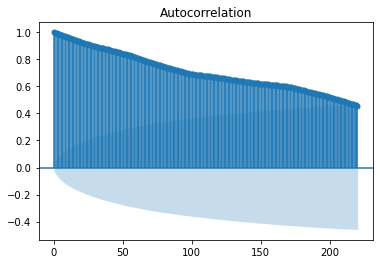

In [13]:
plot_acf(small_df.PriceUSD[561:len(small_df)],lags=220)
plt.show()

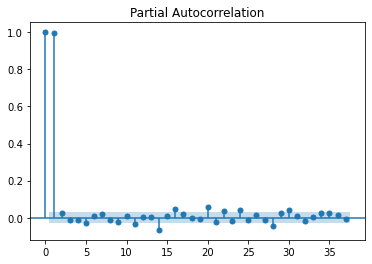

In [14]:
non_nan = 561
plot_pacf(small_df.PriceUSD[non_nan:len(small_df)])
plt.show()

In [15]:
serie = small_df.PriceUSD[561:len(small_df)]
kpss(serie,nlags="auto")

C:\Users\Meyss\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


(4.694795695951928,
 0.01,
 40,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [16]:
kpss(serie,nlags=220)

C:\Users\Meyss\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


(1.052216425568362,
 0.01,
 220,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

### La valeur calculée appartient à la zone de rejet 0.05, le test est significatif au niveau alpha. On rejette l’hypothèse nulle H0 (la serie est stationaire) et on décide que l’hypothèse alternative H1 (la serie est non stationaire) est vraie

In [17]:
new_df = small_df.PriceUSD[4200:len(small_df)]

<AxesSubplot:>

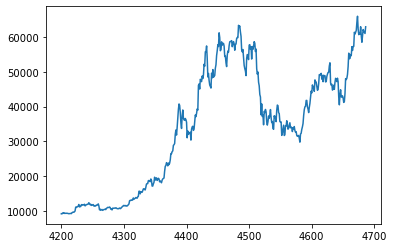

In [18]:
new_df.plot()

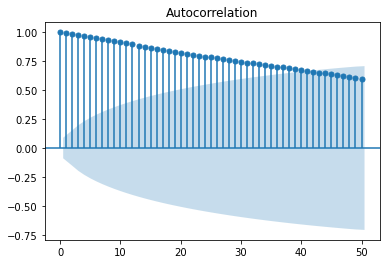

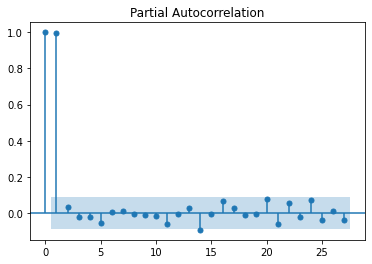

In [19]:
plot_acf(new_df,lags=50)
plt.show()
plot_pacf(new_df)
plt.show()

In [20]:
kpss(serie,nlags=40)

C:\Users\Meyss\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


(4.694795695951928,
 0.01,
 40,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

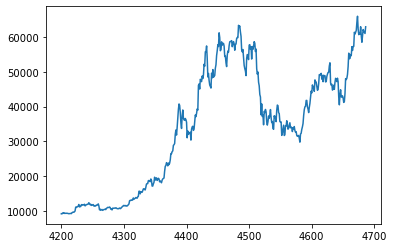

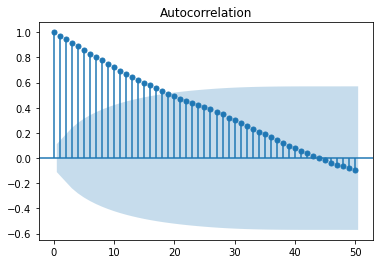

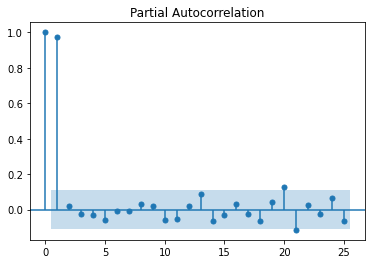

C:\Users\Meyss\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


(9.860436922092838,
 0.01,
 18,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [21]:
new_df0 = small_df.PriceUSD[4375:len(small_df)]
new_df.plot()
plot_acf(new_df0,lags=50)
plt.show()
plot_pacf(new_df0)
plt.show()
kpss(serie,nlags=18)

### Monte Carlo Simulation

<AxesSubplot:>

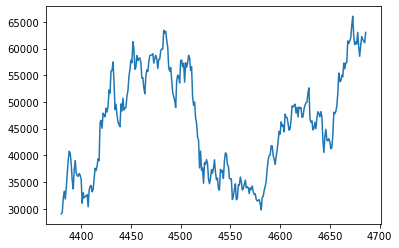

In [22]:
new_df1 = small_df.PriceUSD[4380:len(small_df)]
new_df1.plot()

In [23]:
new_df1.head()

4380    29022.671413
4381    29380.693733
4382    32022.681058
4383    33277.835305
4384    31802.146714
Name: PriceUSD, dtype: float64

<AxesSubplot:>

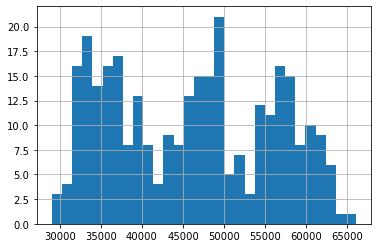

In [24]:
new_df1.hist(bins=30)

### Generating random numbers following the distribution

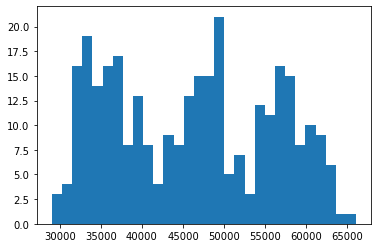

In [25]:
plt.hist(new_df1,bins=30)
plt.show()

In [26]:
count, division = np.histogram(new_df1,bins=30)
count

array([ 3,  4, 16, 19, 14, 16, 17,  8, 13,  8,  4,  9,  8, 13, 15, 15, 21,
        5,  7,  3, 12, 11, 16, 15,  8, 10,  9,  6,  1,  1], dtype=int64)

In [27]:
division

array([29022.67141262, 30257.30891767, 31491.94642272, 32726.58392776,
       33961.22143281, 35195.85893785, 36430.4964429 , 37665.13394794,
       38899.77145299, 40134.40895804, 41369.04646308, 42603.68396813,
       43838.32147317, 45072.95897822, 46307.59648327, 47542.23398831,
       48776.87149336, 50011.5089984 , 51246.14650345, 52480.78400849,
       53715.42151354, 54950.05901859, 56184.69652363, 57419.33402868,
       58653.97153372, 59888.60903877, 61123.24654381, 62357.88404886,
       63592.52155391, 64827.15905895, 66061.796564  ])

In [28]:
1/np.sum(count)

0.003257328990228013

In [29]:
np.random.uniform(0,1)

0.319417387127645

### L'algorithme :

In [30]:
sum_bckt = 0
intrvl = 1/np.sum(count)
tirage = np.random.uniform(0,1)
bckt = []
for i in range(len(count)):
    sum_bckt += count[i]
    if intrvl*sum_bckt >= tirage:
        bckt.append(i)
        break

### On vérifie que l'algorithme fonctionne en réitérant le problème et voir si la distribution matche l'originale (spoil : c'est le cas)

In [31]:
sum_bckt = 0
intrvl = 1/np.sum(count)
tirage = np.random.uniform(0,1)
bckt = []
for j in range(10000):
    sum_bckt = 0
    tirage = np.random.uniform(0,1)
    for i in range(len(count)):
        sum_bckt += count[i]
        if intrvl*sum_bckt >= tirage:
            bckt.append(i)
            break

(array([102., 129., 526., 622., 459., 512., 545., 255., 472., 258., 131.,
        297., 227., 441., 450., 507., 673., 178., 216.,  97., 402., 375.,
        535., 501., 252., 312., 291., 171.,  27.,  37.]),
 array([ 0.        ,  0.96666667,  1.93333333,  2.9       ,  3.86666667,
         4.83333333,  5.8       ,  6.76666667,  7.73333333,  8.7       ,
         9.66666667, 10.63333333, 11.6       , 12.56666667, 13.53333333,
        14.5       , 15.46666667, 16.43333333, 17.4       , 18.36666667,
        19.33333333, 20.3       , 21.26666667, 22.23333333, 23.2       ,
        24.16666667, 25.13333333, 26.1       , 27.06666667, 28.03333333,
        29.        ]),
 <BarContainer object of 30 artists>)

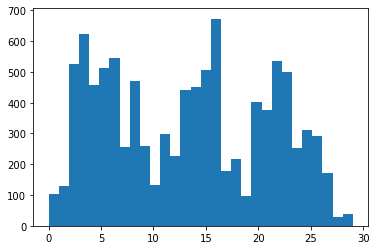

In [32]:
plt.hist(bckt,bins=30)

### Application

In [33]:
def estimate_future(df,bins):
    count, division = np.histogram(df,bins=bins)
    sum_bckt = 0
    intrvl = 1/np.sum(count)
    tirage = np.random.uniform(0,1)
    index = 0
    for i in range(len(count)):
        sum_bckt += count[i]
        if intrvl*sum_bckt >= tirage:
            index = i
            break
    #print(count[i])
    # return the mean of the edges of one bucket in the histogram
    return np.mean([division[i], division[i+1]])

def week_estimation(df,bins):
    week = []
    for i in range(7):
        week.append(estimate_future(df,bins))
    return week

def month_estimation(df,bins):
    month = []
    for i in range(30):
        month.append(estimate_future(df,bins))
    return month

In [34]:
week_estimation(new_df1,30)
month_estimation(new_df1,30);

In [35]:
# plot the dataframe and predicted value side by side
def plotting_estimate(estim_nbr,df,w_m : str):
    
    len_est = 0
    # indexes of df
    if w_m == "week":
        len_est = 7
    elif w_m == "month":
        len_est = 30
    else : 
        print("Error : ("+ str(w_m) +") unknow w_m argument")
        return
        
    indexes_for_df = [i for i in range(df.index[-1]+1,df.index[-1]+1+len_est)]
    
    estimates = {}
    # plotting the estimates
    for i in range(estim_nbr):
        if w_m == "week":
            estimation_array = week_estimation(df,30)
        elif w_m == "month":
            estimation_array = month_estimation(df,30)
        else : 
            print("Error : ("+ str(w_m) +") unknow w_m argument")
            break
        estimates["est"+str(i)]= pd.DataFrame(estimation_array,index=indexes_for_df).squeeze()
        estimates["est"+str(i)].plot()
    
    # plot the mean
    sum_est = 0
    
    for key in estimates:
        sum_est += estimates[key]
    sum_est /= estim_nbr
    plt.plot(sum_est,color='red', marker='o', linestyle='dashed')
    
    # plot the second dataframe
    plt.show()
    print(sum_est)
    return estimates, sum_est

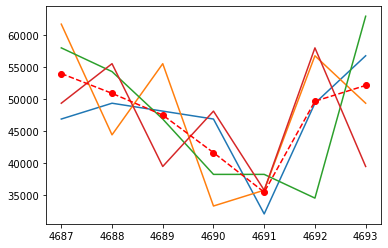

4687    54024.080890
4688    50937.487127
4689    47542.233988
4690    41677.705839
4691    35504.518314
4692    49702.849622
4693    52172.124632
Name: 0, dtype: float64


In [36]:
nb_est = 4
estimates, sum_est = plotting_estimate(nb_est,new_df1,"week");

In [37]:
sum_est

4687    54024.080890
4688    50937.487127
4689    47542.233988
4690    41677.705839
4691    35504.518314
4692    49702.849622
4693    52172.124632
Name: 0, dtype: float64

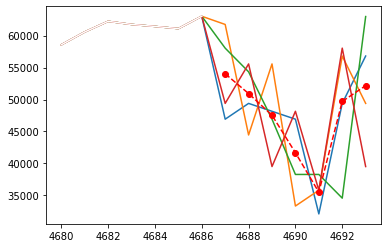

In [38]:
for i in range(nb_est):
    plt.plot(pd.concat([new_df1[300:],estimates["est"+str(i)]]))
    new_df1[300:].plot(colormap="bone_r")
plt.plot(sum_est,color='red', marker='o', linestyle='dashed')
plt.show()

### GARCH

In [39]:
from arch import arch_model

#### parameter tuning

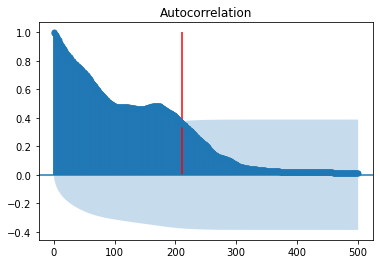

In [40]:
# transform to serie
serie = small_df["PriceUSD"].squeeze()
# remove the nan values
serie = serie[561:]
# square the data 
squared_data = np.array([x**2 for x in serie])
# create acf plot
plot_acf(squared_data,lags=500)
plt.vlines(211,0,1,colors="r")
plt.show()

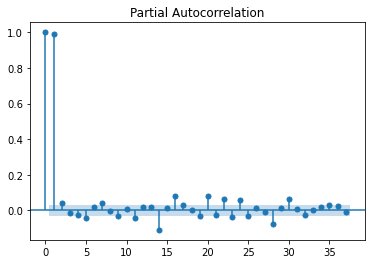

In [41]:
plot_pacf(squared_data);

l'autocorrélation partielle de la serie au carré est limitée à un lag de 1, un GARCH(1,1) sera largement suffisant pour notre modèle

In [42]:
n_test = round(serie.index[-1]*0.1)
n_test

469

In [70]:
test, train = serie[-n_test:], serie[:-n_test]

#### standard error of the mean

In [71]:
np.std(serie)/len(serie)

2.9886932385860545

#### define the first model, we are going to iterate multiple model and select the best one

### GARCH(1,1)

In [72]:
model1 = arch_model(train, vol='GARCH', p=1, q=1,rescale=False)
model_fit1 = model1.fit(update_freq=7);
y1 = model_fit1.forecast(horizon=n_test,method="bootstrap",reindex=False);

Iteration:      7,   Func. Count:     38,   Neg. LLF: 33811.67602752008
Iteration:     14,   Func. Count:     76,   Neg. LLF: 30282.984532119714
Iteration:     21,   Func. Count:    111,   Neg. LLF: 30282.92733015692
Iteration:     28,   Func. Count:    146,   Neg. LLF: 30077.59166492815
Iteration:     35,   Func. Count:    193,   Neg. LLF: 28349.254299212054
Iteration:     42,   Func. Count:    234,   Neg. LLF: 28311.082067027615
Iteration:     49,   Func. Count:    272,   Neg. LLF: 28285.04195422909
Optimization terminated successfully    (Exit mode 0)
            Current function value: 28285.022020904435
            Iterations: 55
            Function evaluations: 301
            Gradient evaluations: 55


In [73]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               PriceUSD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -28285.0
Distribution:                  Normal   AIC:                           56578.0
Method:            Maximum Likelihood   BIC:                           56602.9
                                        No. Observations:                 3657
Date:                Thu, Nov 04 2021   Df Residuals:                     3656
Time:                        17:29:00   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           237.2491      2.151    110.288      0.000 [2.330e+02,2.415e+02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         16.7812      6.587      2.548  1.085e-02   [  3.871, 29.692]
alpha[1]       0.7579  8.190e-02      9.255  2.148e-20   [  0.597,  0.918]
beta[1]        0.2421  8.291e-02      2.920  3.505e-03 [7.956e-02,  0.405]
==========================================================================

Covariance estimator: robust
"""

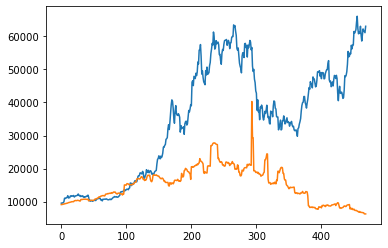

In [74]:
test.index  = [i for i in range(0,len(test))]
plt.plot(test)
plt.plot(np.sqrt(y1.variance.values[-1,:]))

### GARCH(211,211)

Est inintéressant car signifie que l'on veut modéliser notre série par elle meme et 211 termes passées -> stupide. On se limitera à la modéliser à une semaine près dans le passé cad GARCH(7,X) maximum. X représentant les variances passées

### Prediction for the next day

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

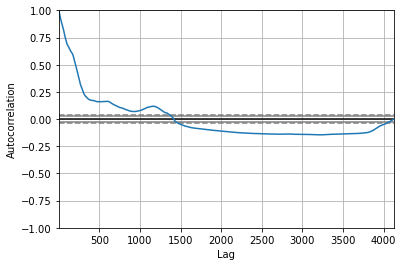

In [94]:
from pandas.plotting import autocorrelation_plot

# autocorrelation
autocorrelation_plot(serie)

In [109]:
train0 = serie[4000:]
model2 = arch_model(train0,vol='ARCH',dist="studentst", p=1,q=1,rescale=False)
model_fit2 = model2.fit(update_freq=7)
y2 = model_fit2.forecast(horizon=10,method="simulation",reindex=False)
model_fit2.summary()

Iteration:      7,   Func. Count:     36,   Neg. LLF: 1272.5738875335544
Iteration:     14,   Func. Count:     81,   Neg. LLF: 1272.1091500114608
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1272.108749213609
            Iterations: 16
            Function evaluations: 101
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - ARCH Model Results                         
====================================================================================
Dep. Variable:                     PriceUSD   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -1272.11
Distribution:      Standardized Student's t   AIC:                           2552.22
Method:                  Maximum Likelihood   BIC:                           2563.56
                                              No. Observations:                  126
Date:                      Thu, Nov 04 2021   Df Residuals:                      125
Time:                              17:37:03   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.6172e+04    574.657     80.347      0.000 [4.505e+04,4.730e+04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      8.6159e+06  3.854e+06      2.235  2.539e-02 [1.062e+06,1.617e+07]
alpha[1]       0.8399  5.993e-02     14.013  1.300e-44     [  0.722,  0.957]
                                Distribution                                
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
nu           460.3459     97.261      4.733  2.211e-06 [2.697e+02,6.510e+02]
============================================================================

Covariance estimator: robust
"""

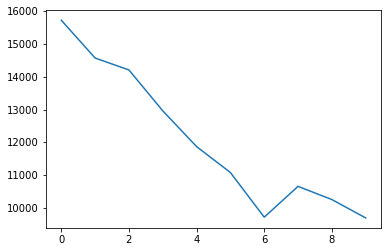

In [110]:
plt.plot(np.sqrt(y2.variance.values[-1,:]))

In [58]:
y2.variance.values

array([[2.74929442e+09, 8.76425722e+08, 3.00604161e+08, 1.11869204e+08,
        5.36302620e+07, 3.29503676e+07, 2.71343051e+07, 2.57128679e+07,
        2.41812753e+07, 2.43951940e+07]])

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               PriceUSD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -38297.4
Distribution:                  Normal   AIC:                           76602.8
Method:            Maximum Likelihood   BIC:                           76628.1
                                        No. Observations:                 4126
Date:                Thu, Nov 04 2021   Df Residuals:                     4125
Time:                        15:36:32   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           443.4824      9.706     45.691      0.000 [4.245e+02,4.625e+02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.0412e+06  4.111e+04     73.972      0.000  [2.961e+06,3.122e+06]
alpha[1]       0.8867  1.303e-02     68.070      0.000      [  0.861,  0.912]
beta[1]    1.4416e-12  1.457e-02  9.895e-11      1.000 [-2.855e-02,2.855e-02]
=============================================================================

Covariance estimator: robust
"""